# Neural Network Exercise

## Objective
Build and train a neural network with one hidden layer using PyTorch to classify a dataset with multiple classes. Implement the network without using high-level abstractions like `torch.nn` or `torch.optim`. Visualize the cost reduction over iterations to ensure that gradient descent is working effectively.

## Dataset
- Generate a dataset using the `make_blobs` function from `sklearn.datasets`.
- The dataset should have 500 samples, 3 classes, and 2 features.
- Use a random state of 42 for reproducibility.
- Separate out 100 samples for testing.

## Neural Network Specifications
- The network should have one hidden layer.
- The input layer should have 2 neurons (corresponding to the 2 features of the dataset).
- The hidden layer should have 5 neurons.
- The output layer should have 3 neurons (corresponding to the 3 classes).
- Use the sigmoid activation function for the hidden layer.
- Use the softmax activation function for the output layer.
- Initialize the weights randomly from a normal distribution.
- Initialize the biases to zeros.

## Training Specifications
- Use the negative log likelihood (logarithmic loss) as the cost function.
- Implement gradient descent to update the weights and biases.
- Do not use `torch.optim` or any other optimization library.
- Use a learning rate of 0.01.
- Train the network for 1000 epochs.
- Print the cost every 100 epochs.

## Visualization
- Plot the cost over the epochs to visualize the training progress.

## Evaluation
- After training, compute and print the accuracy of the model on the training and testing datasets.


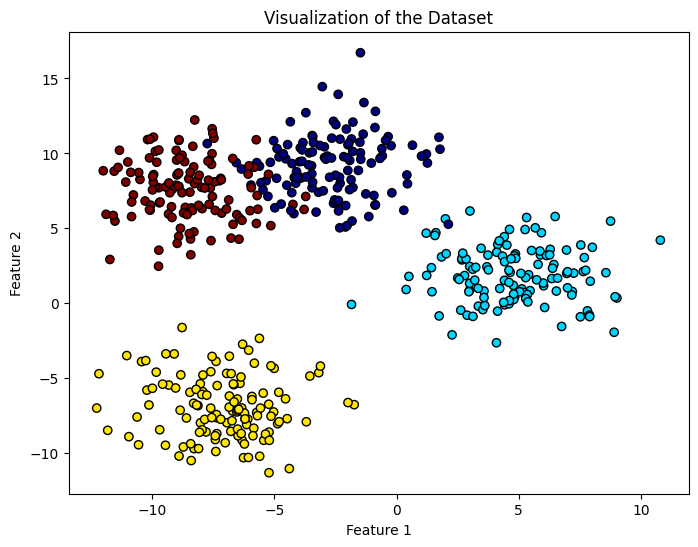

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

# Generate a 2D dataset with 4 centers
X, y = make_blobs(n_samples=500, centers=4, n_features=2, cluster_std=2.0, random_state=42)
# separate out 20% of the data for testing
test_size = 0.2
test_size = int(test_size * X.shape[0])
X_train, X_test = X[:-test_size].copy(), X[-test_size:].copy()
y_train, y_test = y[:-test_size].copy(), y[-test_size:].copy()

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of the Dataset')
plt.show()


Epoch 0, Cost: 1012.5538940429688
Epoch 100, Cost: 47.52414321899414
Epoch 200, Cost: 43.37223434448242
Epoch 300, Cost: 39.152976989746094
Epoch 400, Cost: 38.37609100341797
Epoch 500, Cost: 46.732330322265625
Epoch 600, Cost: 40.06040573120117
Epoch 700, Cost: 33.94929504394531
Epoch 800, Cost: 29.20322036743164
Epoch 900, Cost: 26.190814971923828


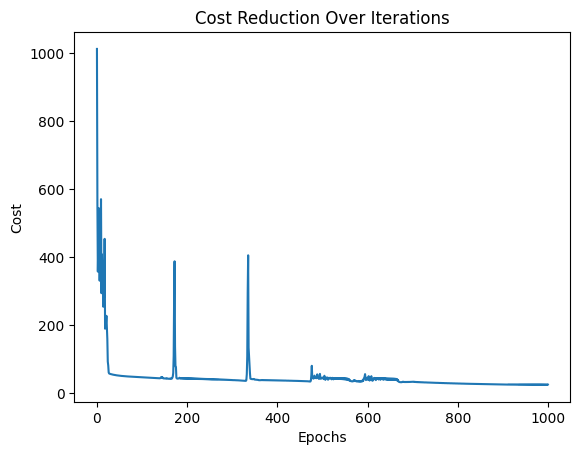

Accuracy on the training set: 0.97
Accuracy on the test set: 0.95


In [7]:
import torch

X = torch.tensor(X_train, dtype=torch.float32)
y = torch.tensor(y_train, dtype=torch.long)

# Initialize parameters
input_size = 2
hidden_size = 5
output_size = 4
learning_rate = 0.01
epochs = 1000

W1 = torch.randn(input_size, hidden_size, requires_grad=True)
b1 = torch.zeros(hidden_size, requires_grad=True)
W2 = torch.randn(hidden_size, output_size, requires_grad=True)
b2 = torch.zeros(output_size, requires_grad=True)

# Convert labels to one-hot encoding
Y = torch.zeros(y.size(0), output_size)
Y[torch.arange(y.size(0)), y] = 1

# Training the model
costs = []
for epoch in range(epochs):
    # Forward pass
    Z1 = torch.matmul(X, W1) + b1
    A1 = torch.sigmoid(Z1)
    Z2 = torch.matmul(A1, W2) + b2
    A2 = torch.softmax(Z2, dim=1)

    # Compute cost (negative log likelihood loss)
    cost = -torch.sum(Y * torch.log(A2))
    costs.append(cost.item())

    # Backward pass
    cost.backward()

    # Update parameters
    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        b1 -= learning_rate * b1.grad
        W2 -= learning_rate * W2.grad
        b2 -= learning_rate * b2.grad

        # Manually zero the gradients after updating weights
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Cost: {cost}')

# Plotting the cost, uncomment the following lines
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Iterations')
plt.show()



# Evaluate accuracy on the training set
_, predictions = torch.max(A2, 1)
accuracy = torch.sum(y == predictions).item() / y.size(0)
print(f'Accuracy on the training set: {accuracy:.2f}')

# Evaluate acccuracy on the test set
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)
Z1 = torch.matmul(X_test, W1) + b1
A1 = torch.sigmoid(Z1)
Z2 = torch.matmul(A1, W2) + b2
A2 = torch.softmax(Z2, dim=1)
_, predictions = torch.max(A2, 1)
accuracy = torch.sum(y_test == predictions).item() / y_test.size(0)
print(f'Accuracy on the test set: {accuracy:.2f}')
